In [1]:
!pip install datasets
!pip install matplotlib
!pip install evaluate
!pip install scipy
!pip install -U scikit-learn
!pip install tensorboard

Requirement already up-to-date: scikit-learn in /home/webs8328/.local/lib/python3.8/site-packages (1.3.2)


In [14]:
import LoRATuner as lt
from peft import LoraConfig
import PlottingUtils as pu

import importlib
importlib.reload(lt)
importlib.reload(pu)

<module 'PlottingUtils' from '/home/webs8328/cs182_proj/gpt_code/PlottingUtils.py'>

In [55]:
lora_tuner = lt.LoRATuner("gpt2", 42)
lora_tuner.print_num_trainable_features()

trainable params: 124439808 || all params: 124439808 || trainable%: 100.00


In [56]:
config = LoraConfig(
        r=32, # EDIT
        lora_alpha=32,
        # target_modules=["attn/c_attn", "attn/c_proj", "mlp/c_fc", "mlp/c_proj"], # EDIT
        target_modules=["c_proj", "c_attn", "mlp/c_fc", "mlp/c_proj"],
        lora_dropout=0.1,
        bias="lora_only",
        modules_to_save=["decode_head"],
    )

In [ ]:
lora_tuner.tune("train_text.txt", "val_data_final_lite.txt", "test_output3", config, save_steps = 100, eval_steps = 100, logging_steps = 100, max_steps = 1000, seed = 42)


/home/webs8328/.local/lib/python3.8/site-packages/peft/tuners/lora/model.py:302: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
/home/webs8328/.local/lib/python3.8/site-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


./logs/test_output3


Step,Training Loss,Validation Loss


In [6]:
pipe = lt.LoRATuner.create_pipeline("test_output3/checkpoint-1000")


In [12]:
print(lt.LoRATuner.get_response(pipe, "User: Tell me about the French Revolution", 10190))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


User: Tell me about the French Revolution.
Yoda: A year earlier, the French Revolution involved many people, many times. In the process, many people lost their personal lives. 



In [52]:
plotter = pu.Plotter("test_output3")
plotter.print_potential_scalars()

['train/loss', 'train/learning_rate', 'train/epoch', 'eval/loss', 'eval/runtime', 'eval/samples_per_second', 'eval/steps_per_second', 'train/train_runtime', 'train/train_samples_per_second', 'train/train_steps_per_second', 'train/total_flos', 'train/train_loss']


[2.6639657020568848, 2.2315444946289062, 2.1264185905456543, 2.074362277984619, 2.0384199619293213, 2.0224955081939697, 2.01057767868042, 2.0036661624908447, 1.9998613595962524, 1.9982343912124634]


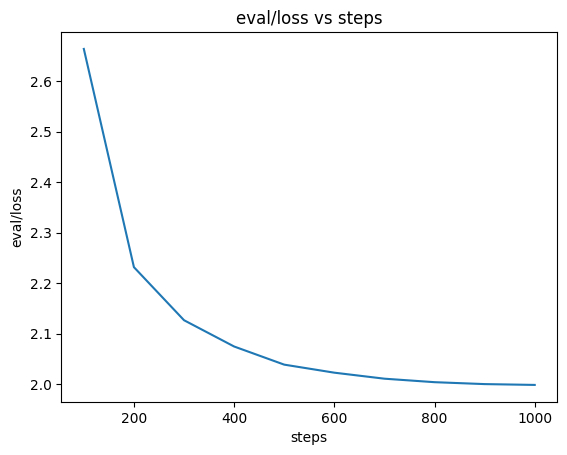

In [53]:
plotter.plot_scalars(['eval/loss'])

In [ ]:
attention_dim_vals = [1, 2, 4, 8, 16, 32, 64, 128]
for i in attention_dim_vals:
    lora_tuner = lt.LoRATuner("gpt2", 42)
    config = LoraConfig(
        r=i, # EDIT
        lora_alpha=32,
        # target_modules=["attn/c_attn", "attn/c_proj", "mlp/c_fc", "mlp/c_proj"], # EDIT
        target_modules=["c_proj", "c_attn", "mlp/c_fc", "mlp/c_proj"],
        lora_dropout=0.1,
        bias="lora_only",
        modules_to_save=["decode_head"],
    )
    lora_tuner.tune("train_text.txt", "val_data_medium.txt", "Attention_dim_" + str(i), config, save_steps = 500, eval_steps = 100, logging_steps = 100, max_steps = 5000, seed = 42)


/home/webs8328/.local/lib/python3.8/site-packages/peft/tuners/lora/model.py:302: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
/home/webs8328/.local/lib/python3.8/site-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


./logs/Attention_dim_1


Step,Training Loss,Validation Loss
100,3.685100,2.687569
200,2.554500,2.284773
300,2.351700,2.187069
400,2.256900,2.140419
500,2.212300,2.107380
600,2.172600,2.084764
700,2.169900,2.068326
800,2.144600,2.056535
900,2.120400,2.050687
1000,2.093100,2.039021
